In [180]:
from torch_geometric.datasets import Planetoid

In [181]:
dataset = Planetoid('dataset', 'CiteSeer', split='public')

In [182]:
len(dataset)

1

In [206]:
dataset = Planetoid('dataset', 'Cora', split='public')


In [207]:
data = dataset[0]

In [212]:
data.x[data.train_mask].shape

torch.Size([140, 1433])

[(0, 1, 0), (0, 2, 0), (0, 3, 0)]
[0.6853554  0.65664876] [0.14483912 0.6247451 ]
[0.6853554  0.65664876] [0.12032649 0.839218  ]
[0.6853554  0.65664876] [0.0429733  0.84485835]


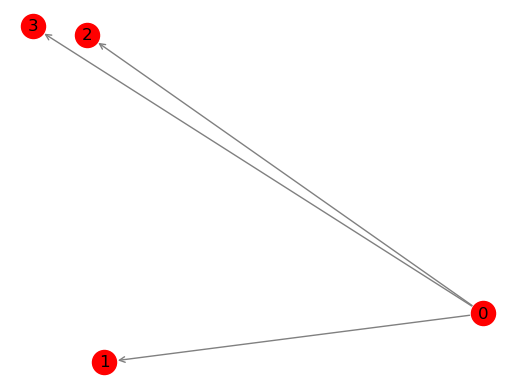

tensor([[-1.8807],
        [-0.0456],
        [-0.9089],
        [-1.6107]])


In [196]:

import torch
import numpy as np
import networkx as nx

from torch_geometric.utils import to_networkx

from torch_geometric.data import Data
import matplotlib.pyplot as plt

def draw_data(data):
    G = to_networkx(data, to_multi=True)
    print(G.edges)
    pos = nx.random_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='r')
    nx.draw_networkx_labels(G, pos)
    ax = plt.gca()
    for e in G.edges:
        print(pos[e[0]], pos[e[1]])
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="<-", color="0.5",
                                    shrinkA=10, shrinkB=10,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                    ),
                                    ),
                    )
    plt.axis('off')
    plt.show()
    
    
data = Data()
data.x = torch.randn((4, 1))
data.edge_index = torch.tensor([
    [0,1],
    [0,2],
    [0,3]
]).t().contiguous()
draw_data(data)
print(data.x)

In [217]:
from torch_geometric.loader import NeighborLoader

dl = NeighborLoader(
    data, 
    [2, 2],
    input_nodes=data.train_mask,
    batch_size=2,
    directed=True
)

for batch in dl:
    print(batch)
    break
    
batch.edge_index

Data(x=[11, 1433], edge_index=[2, 12], y=[11], train_mask=[11], val_mask=[11], test_mask=[11], n_id=[11], e_id=[12], input_id=[2], batch_size=2)


EdgeIndex([[ 2,  3,  4,  5,  0,  6,  0,  7,  8,  9,  1, 10],
           [ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5]],
          sparse_size=(11, 11), nnz=12, sort_order=col)

In [218]:
batch.input_id

tensor([0, 1])

In [219]:
batch.train_mask

tensor([ True,  True, False, False,  True, False, False, False, False, False,
        False])